In [4]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import mglearn # pip install mglearn
from sklearn.model_selection import train_test_split

In [5]:
# import training and test data sets from make_forge dataset
X, y = mglearn.datasets.make_forge()
# split the test and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

c:\users\mb-user\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


In [6]:
# Import the sklearn.neighbors 
from sklearn.neighbors import KNeighborsClassifier
# Instantiate the KNeighborsClassifer with 3 neighbors
clf = KNeighborsClassifier(n_neighbors=3)

In [7]:
# Fit the model fo the training set, storing the data to compute predictions
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [8]:
# Make the prediction on the test data 
print("Test set predictions: {}".format(clf.predict(X_test)))

Test set predictions: [1 0 1 0 1 0 0]


In [10]:
# Check the accuracy of the model against the test data
print("Test set accuracy: {:2f}".format(clf.score(X_test, y_test)))

Test set accuracy: 0.857143


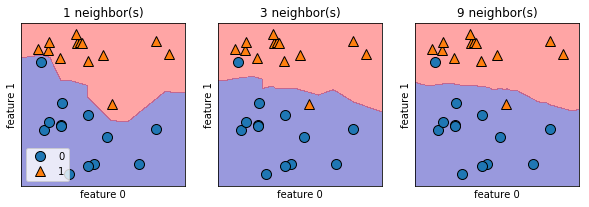

In [11]:
# Create subplots for decision boundaries plots 
fig, axes = plt.subplots(1,3,figsize=(10,3))
# Run the model for three different neighbor settings 
for n_neighbors, ax in zip([1,3,9], axes):
    #the fit method returns the object self, so we can instantiate and fit in one line
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    # Use mglearn to plot the decision boundary of current n_neighbor
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

In [12]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=0)

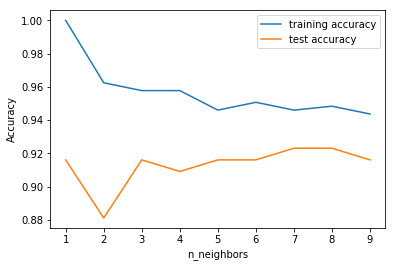

In [13]:
training_accuracy =[]
testing_accuracy = []
# try n_neighbors from 1 to 10 
neighbors_settings = range(1, 10)

for n_neighbors in neighbors_settings: 
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # append the training accuracy for neighbors
    training_accuracy.append(clf.score(X_train, y_train))
    # append the testing accuracy for neighbors 
    testing_accuracy.append(clf.score(X_test, y_test))
    
# plot the accuracy results 
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, testing_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()